In [1]:
import pandas as pd
from sklearn.feature_extraction import text
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
import stop_words as sw
from nltk.tokenize import word_tokenize 
from sklearn.preprocessing import Normalizer

## Data preprocessing

### Read data

In [2]:
df_pl_tweets = pd.read_csv("data/pl_scraped_tweets2.csv", delimiter=',')
df_pl_tweets.head(2)

,Unnamed: 0,id,date,media,lang,content,hashtags,likeCount,replyCount,quoteCount,user_name,user_location,user_isprotected,user_isverified
0,0,1590493636424503296,2022-11-09 23:56:47+00:00,NaN,pl,Patrząc po dzisiejszym twitterze brak powołani...,NaN,82,0,0,ElKova11,"Gdańsk, Polska",False,False
1,1,1590493490454364160,2022-11-09 23:56:12+00:00,NaN,pl,awieeee https://t.co/2g9JCV08Fq,NaN,1,0,0,ms_graceyyy,NaN,False,False


In [3]:
df_pl_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        20000 non-null  int64 
 1   id                20000 non-null  int64 
 2   date              20000 non-null  object
 3   media             1983 non-null   object
 4   lang              20000 non-null  object
 5   content           20000 non-null  object
 6   hashtags          1267 non-null   object
 7   likeCount         20000 non-null  int64 
 8   replyCount        20000 non-null  int64 
 9   quoteCount        20000 non-null  int64 
 10  user_name         20000 non-null  object
 11  user_location     11381 non-null  object
 12  user_isprotected  20000 non-null  bool  
 13  user_isverified   20000 non-null  bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 1.9+ MB


In [4]:
df_en_tweets = pd.read_csv("data/en_scraped_tweets2.csv", delimiter=',')
df_en_tweets.head(2)

,Unnamed: 0,id,date,media,lang,content,hashtags,likeCount,replyCount,quoteCount,user_name,user_location,user_isprotected,user_isverified
0,0,1586870117631086592,2022-10-30 23:58:13+00:00,NaN,en,@Futuball_io Very good project \n@ronibd_raj \...,"['Futuball', 'FB', 'WorldCup2022', 'BNB']",0,0,0,JibonMi34339450,NaN,False,False
1,1,1586869850672140289,2022-10-30 23:57:09+00:00,NaN,es,@fifaworldcup_es @Nacional gracias firme,NaN,3,0,0,Totoa1899,República de Villa Española,False,False


In [5]:
df_en_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        20000 non-null  int64 
 1   id                20000 non-null  int64 
 2   date              20000 non-null  object
 3   media             5138 non-null   object
 4   lang              20000 non-null  object
 5   content           20000 non-null  object
 6   hashtags          12170 non-null  object
 7   likeCount         20000 non-null  int64 
 8   replyCount        20000 non-null  int64 
 9   quoteCount        20000 non-null  int64 
 10  user_name         20000 non-null  object
 11  user_location     12681 non-null  object
 12  user_isprotected  20000 non-null  bool  
 13  user_isverified   20000 non-null  bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 1.9+ MB


### clean columns

#### Ensure that pl tweets are just in polish and en are just in english

In [6]:
df_pl_tweets = df_pl_tweets.loc[df_pl_tweets['lang'] == 'pl']
df_pl_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        19998 non-null  int64 
 1   id                19998 non-null  int64 
 2   date              19998 non-null  object
 3   media             1983 non-null   object
 4   lang              19998 non-null  object
 5   content           19998 non-null  object
 6   hashtags          1266 non-null   object
 7   likeCount         19998 non-null  int64 
 8   replyCount        19998 non-null  int64 
 9   quoteCount        19998 non-null  int64 
 10  user_name         19998 non-null  object
 11  user_location     11380 non-null  object
 12  user_isprotected  19998 non-null  bool  
 13  user_isverified   19998 non-null  bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 2.0+ MB


In [7]:
df_en_tweets = df_en_tweets.loc[df_en_tweets['lang'] == 'en']
df_en_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19867 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        19867 non-null  int64 
 1   id                19867 non-null  int64 
 2   date              19867 non-null  object
 3   media             5098 non-null   object
 4   lang              19867 non-null  object
 5   content           19867 non-null  object
 6   hashtags          12121 non-null  object
 7   likeCount         19867 non-null  int64 
 8   replyCount        19867 non-null  int64 
 9   quoteCount        19867 non-null  int64 
 10  user_name         19867 non-null  object
 11  user_location     12602 non-null  object
 12  user_isprotected  19867 non-null  bool  
 13  user_isverified   19867 non-null  bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 2.0+ MB


In [8]:
df_list = [df_pl_tweets, df_en_tweets]

##### add new, simpler index

In [9]:
# create new index
for df in df_list:
    df.insert(0, 'ID', range(0, len(df)))
    df = df.set_index('ID')

In [10]:
df_en_tweets.head(3)

,ID,Unnamed: 0,id,date,media,lang,content,hashtags,likeCount,replyCount,quoteCount,user_name,user_location,user_isprotected,user_isverified
0,0,0,1586870117631086592,2022-10-30 23:58:13+00:00,NaN,en,@Futuball_io Very good project \n@ronibd_raj \...,"['Futuball', 'FB', 'WorldCup2022', 'BNB']",0,0,0,JibonMi34339450,NaN,False,False
2,1,2,1586869642605125632,2022-10-30 23:56:20+00:00,NaN,en,@ikkanomics Scnrio. Worldcup Ind Vs SA:Cricket...,NaN,0,0,0,dbdon4,NaN,False,False
3,2,3,1586869559524577281,2022-10-30 23:56:00+00:00,NaN,en,@OGDfarmer In the meantime @flufworld is build...,NaN,2,0,0,iAmKaolo,NaN,False,False


In [11]:
df_pl_tweets = df_pl_tweets[['ID', 'lang', 'content', 'user_location']]
df_pl_tweets.head(3)

,ID,lang,content,user_location
0,0,pl,Patrząc po dzisiejszym twitterze brak powołani...,"Gdańsk, Polska"
1,1,pl,awieeee https://t.co/2g9JCV08Fq,NaN
2,2,pl,"-Brak większej liczby reprezentacji, choćby ty...","Szczecin, Polska"


In [12]:
df_en_tweets = df_en_tweets[['ID', 'lang', 'content', 'user_location']]
df_en_tweets.head(3)

,ID,lang,content,user_location
0,0,en,@Futuball_io Very good project \n@ronibd_raj \...,NaN
2,1,en,@ikkanomics Scnrio. Worldcup Ind Vs SA:Cricket...,NaN
3,2,en,@OGDfarmer In the meantime @flufworld is build...,NaN


#### Encode location column

In [13]:
oe = OrdinalEncoder()

df_list = [df_pl_tweets, df_en_tweets]

for df in df_list:
    df['location'] = df['user_location']
    df['location'] = oe.fit_transform(np.array(df['location']).reshape(-1, 1))

In [14]:
df_en_tweets = df_en_tweets.drop(columns = ['user_location'])
df_en_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19867 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        19867 non-null  int64  
 1   lang      19867 non-null  object 
 2   content   19867 non-null  object 
 3   location  12602 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 776.1+ KB


In [15]:
df_pl_tweets = df_pl_tweets.drop(columns = ['user_location'])
df_pl_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        19998 non-null  int64  
 1   lang      19998 non-null  object 
 2   content   19998 non-null  object 
 3   location  11380 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 781.2+ KB


In [16]:
df_pl_tweets.head(2)

,ID,lang,content,location
0,0,pl,Patrząc po dzisiejszym twitterze brak powołani...,462.0
1,1,pl,awieeee https://t.co/2g9JCV08Fq,NaN


In [17]:
df_en_tweets.head(2)

,ID,lang,content,location
0,0,en,@Futuball_io Very good project \n@ronibd_raj \...,NaN
2,1,en,@ikkanomics Scnrio. Worldcup Ind Vs SA:Cricket...,NaN


### Clean text content

#### clean special characters and whitespaces

In [18]:
df_list =  [df_pl_tweets, df_en_tweets]

white_spaces = ["\r", "\n","\t", "    "]
punctuation_signs = list("?:!.,;")
special_characters = list("@#")

for df in df_list:

    df['content_clean_1'] = df['content']

    # whitespaces
    for char in white_spaces:
        df['content_clean_1'] = df['content_clean_1'].str.replace(char, " ")

    # quotation marks
    df['content_clean_1'] = df['content_clean_1'].str.replace('"', '')


    # puncuation signs
    for sign in punctuation_signs:
        df['content_clean_1'] = df['content_clean_1'].str.replace(sign, '')

C:\Users\kasia\AppData\Local\Temp\ipykernel_13160\2167121432.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['content_clean_1'] = df['content_clean_1'].str.replace(sign, '')
C:\Users\kasia\AppData\Local\Temp\ipykernel_13160\2167121432.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['content_clean_1'] = df['content_clean_1'].str.replace(sign, '')


In [19]:
df_pl_tweets['content_clean_1'].head(3)

0    Patrząc po dzisiejszym twitterze brak powołani...
1                        awieeee https//tco/2g9JCV08Fq
2    -Brak większej liczby reprezentacji choćby tyc...
Name: content_clean_1, dtype: object

#### clean hashtags and name tagged users

In [20]:
df_list =  [df_pl_tweets, df_en_tweets]

hashtag_regex = "(#)(((\S)|(\d))*)"
tag_regex = "(@)(((\S)|(\d))*)"

for df in df_list:
    df['content_clean_2'] = df['content_clean_1'].str.replace(pat=hashtag_regex, repl= "")
    df['content_clean_2'] = df['content_clean_2'].str.replace(pat=tag_regex, repl= "")

C:\Users\kasia\AppData\Local\Temp\ipykernel_13160\3938201535.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content_clean_2'] = df['content_clean_1'].str.replace(pat=hashtag_regex, repl= "")
C:\Users\kasia\AppData\Local\Temp\ipykernel_13160\3938201535.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content_clean_2'] = df['content_clean_2'].str.replace(pat=tag_regex, repl= "")
C:\Users\kasia\AppData\Local\Temp\ipykernel_13160\3938201535.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content_clean_2'] = df['content_clean_1'].str.replace(pat=hashtag_regex, repl= "")
C:\Users\kasia\AppData\Local\Temp\ipykernel_13160\3938201535.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content_clean_2'] = df['content_clean_2'].str.replace(pat=tag_regex, repl= "")


In [21]:
df_pl_tweets['content_clean_2'].head(3)

0    Patrząc po dzisiejszym twitterze brak powołani...
1                        awieeee https//tco/2g9JCV08Fq
2    -Brak większej liczby reprezentacji choćby tyc...
Name: content_clean_2, dtype: object

In [22]:
df_en_tweets['content_clean_2'].head(3)

0                         Very good project           
2     Scnrio Worldcup Ind Vs SACricket me Gautam Ga...
3       In the meantime  is building an empire with   
Name: content_clean_2, dtype: object

#### clean emojis

In [23]:
import re

In [24]:

emoji_regex = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

In [25]:
df_list =  [df_pl_tweets, df_en_tweets]

for df in df_list:
    df['content_clean_3'] = df['content_clean_2'].str.replace(pat=emoji_regex, repl= " ")

In [26]:
df_en_tweets['content_clean_3'].head(3)

0                         Very good project           
2     Scnrio Worldcup Ind Vs SACricket me Gautam Ga...
3       In the meantime  is building an empire with   
Name: content_clean_3, dtype: object

In [27]:
df_en_tweets.sample(5)

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3
7681,7632,en,@fifaworldcup_fr Cameroun,742.0,@fifaworldcup_fr Cameroun,Cameroun,Cameroun
10600,10532,en,The only positive from both defeat is that @ba...,1732.0,The only positive from both defeat is that @ba...,The only positive from both defeat is that wi...,The only positive from both defeat is that wi...
18845,18719,en,@Buckleyvilla @Johnsmith2553h @hassanbucheeri ...,NaN,@Buckleyvilla @Johnsmith2553h @hassanbucheeri ...,Are 18 year olds free to love 14 year ol...,Are 18 year olds free to love 14 year ol...
3452,3430,en,@cryptowilson_ @10KWorldCup @Element_Market 0K...,NaN,@cryptowilson_ @10KWorldCup @Element_Market 0K...,0K WorldCup NB,0K WorldCup NB
256,252,en,Vinicius names five countries that can win tou...,1883.0,Vinicius names five countries that can win tou...,Vinicius names five countries that can win tou...,Vinicius names five countries that can win tou...


In [28]:
df_pl_tweets['content_clean_3'].head(3)

0    Patrząc po dzisiejszym twitterze brak powołani...
1                        awieeee https//tco/2g9JCV08Fq
2    -Brak większej liczby reprezentacji choćby tyc...
Name: content_clean_3, dtype: object

In [29]:
df_pl_tweets.sample(5)

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3
7844,7843,pl,@ZiobroPL @MS_GOV_PL 7 długich lat.....,1729.0,@ZiobroPL @MS_GOV_PL 7 długich lat,7 długich lat,7 długich lat
536,535,pl,@mati_stanczyk No to mundial oglądamy na zagra...,750.0,@mati_stanczyk No to mundial oglądamy na zagra...,No to mundial oglądamy na zagranicznych trans...,No to mundial oglądamy na zagranicznych trans...
16609,16607,pl,"220 miliardów zielonych na mundial, który bard...",1729.0,220 miliardów zielonych na mundial który bardz...,220 miliardów zielonych na mundial który bardz...,220 miliardów zielonych na mundial który bardz...
18706,18704,pl,"@umajone @nietabeata Mnie się wydaje, że 8 z p...",NaN,@umajone @nietabeata Mnie się wydaje że 8 z pr...,Mnie się wydaje że 8 z przodu bo inaczej wyg...,Mnie się wydaje że 8 z przodu bo inaczej wyg...
8585,8584,pl,@Bochen_II Eh słabo 😩 chciałbym zobaczyć Rataj...,NaN,@Bochen_II Eh słabo 😩 chciałbym zobaczyć Rataj...,Eh słabo 😩 chciałbym zobaczyć Ratajskiego z 2...,Eh słabo chciałbym zobaczyć Ratajskiego z 2...


#### Remove all 's from en tweets and quotations from polish tweets

In [30]:
df_list =  [df_pl_tweets, df_en_tweets]

df_en_tweets['content_clean_3'] = df_en_tweets['content_clean_3'].str.replace("’s", "")

for df in df_list:
    df['content_clean_4'] = df['content_clean_3'].str.replace("'", "")

In [31]:
df_en_tweets.head()

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3,content_clean_4
0,0,en,@Futuball_io Very good project \n@ronibd_raj \...,NaN,@Futuball_io Very good project @ronibd_raj @...,Very good project,Very good project,Very good project
2,1,en,@ikkanomics Scnrio. Worldcup Ind Vs SA:Cricket...,NaN,@ikkanomics Scnrio Worldcup Ind Vs SACricket m...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...
3,2,en,@OGDfarmer In the meantime @flufworld is build...,NaN,@OGDfarmer In the meantime @flufworld is build...,In the meantime is building an empire with,In the meantime is building an empire with,In the meantime is building an empire with
4,3,en,.@UN .@UNHumanRights .@FIFAcom .@FIFAWorldCup\...,1418.0,@UN @UNHumanRights @FIFAcom @FIFAWorldCup The ...,The should never be awarded to countries ...,The should never be awarded to countries ...,The should never be awarded to countries ...
5,4,en,Some serious questions to be asked if @England...,2075.0,Some serious questions to be asked if @England...,Some serious questions to be asked if don’t g...,Some serious questions to be asked if don’t g...,Some serious questions to be asked if don’t g...


#### Make all lowercase

In [32]:
for df in df_list:
    df['content_clean_5'] = df['content_clean_4'].str.lower()

In [33]:
df_en_tweets.head(2)

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3,content_clean_4,content_clean_5
0,0,en,@Futuball_io Very good project \n@ronibd_raj \...,NaN,@Futuball_io Very good project @ronibd_raj @...,Very good project,Very good project,Very good project,very good project
2,1,en,@ikkanomics Scnrio. Worldcup Ind Vs SA:Cricket...,NaN,@ikkanomics Scnrio Worldcup Ind Vs SACricket m...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,scnrio worldcup ind vs sacricket me gautam ga...


In [34]:
df_pl_tweets.head(2)

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3,content_clean_4,content_clean_5
0,0,pl,Patrząc po dzisiejszym twitterze brak powołani...,462.0,Patrząc po dzisiejszym twitterze brak powołani...,Patrząc po dzisiejszym twitterze brak powołani...,Patrząc po dzisiejszym twitterze brak powołani...,Patrząc po dzisiejszym twitterze brak powołani...,patrząc po dzisiejszym twitterze brak powołani...
1,1,pl,awieeee https://t.co/2g9JCV08Fq,NaN,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9jcv08fq


#### Lemmatize

In [35]:
lemmatizer = WordNetLemmatizer()

In [36]:
df_en_tweets.head()

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3,content_clean_4,content_clean_5
0,0,en,@Futuball_io Very good project \n@ronibd_raj \...,NaN,@Futuball_io Very good project @ronibd_raj @...,Very good project,Very good project,Very good project,very good project
2,1,en,@ikkanomics Scnrio. Worldcup Ind Vs SA:Cricket...,NaN,@ikkanomics Scnrio Worldcup Ind Vs SACricket m...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,scnrio worldcup ind vs sacricket me gautam ga...
3,2,en,@OGDfarmer In the meantime @flufworld is build...,NaN,@OGDfarmer In the meantime @flufworld is build...,In the meantime is building an empire with,In the meantime is building an empire with,In the meantime is building an empire with,in the meantime is building an empire with
4,3,en,.@UN .@UNHumanRights .@FIFAcom .@FIFAWorldCup\...,1418.0,@UN @UNHumanRights @FIFAcom @FIFAWorldCup The ...,The should never be awarded to countries ...,The should never be awarded to countries ...,The should never be awarded to countries ...,the should never be awarded to countries ...
5,4,en,Some serious questions to be asked if @England...,2075.0,Some serious questions to be asked if @England...,Some serious questions to be asked if don’t g...,Some serious questions to be asked if don’t g...,Some serious questions to be asked if don’t g...,some serious questions to be asked if don’t g...


#### Lemmatize and remove stopwords

In [37]:
stop_words_pl = sw.get_stop_words(language="polish")
stop_words_en = sw.get_stop_words(language="english")

In [38]:
df_en_tweets['content_clean_6'] = df_en_tweets['content_clean_5']

lemmatized_texts = []

for row in df_en_tweets['content_clean_6']:
    text = row
    word_tokens = text.split(" ")

    lemmas  = []
    lemmatized_text = []

    for word in word_tokens:
        if word not in stop_words_en:
            lemmas.append(lemmatizer.lemmatize(word, pos = 'v'))

    lemmatized_text = " ".join(lemmas)

    lemmatized_texts.append(lemmatized_text)
    
df_en_tweets['content_clean_6']= lemmatized_texts

In [39]:
df_en_tweets.head()

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3,content_clean_4,content_clean_5,content_clean_6
0,0,en,@Futuball_io Very good project \n@ronibd_raj \...,NaN,@Futuball_io Very good project @ronibd_raj @...,Very good project,Very good project,Very good project,very good project,good project
2,1,en,@ikkanomics Scnrio. Worldcup Ind Vs SA:Cricket...,NaN,@ikkanomics Scnrio Worldcup Ind Vs SACricket m...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,Scnrio Worldcup Ind Vs SACricket me Gautam Ga...,scnrio worldcup ind vs sacricket me gautam ga...,scnrio worldcup ind vs sacricket gautam gambh...
3,2,en,@OGDfarmer In the meantime @flufworld is build...,NaN,@OGDfarmer In the meantime @flufworld is build...,In the meantime is building an empire with,In the meantime is building an empire with,In the meantime is building an empire with,in the meantime is building an empire with,meantime build empire
4,3,en,.@UN .@UNHumanRights .@FIFAcom .@FIFAWorldCup\...,1418.0,@UN @UNHumanRights @FIFAcom @FIFAWorldCup The ...,The should never be awarded to countries ...,The should never be awarded to countries ...,The should never be awarded to countries ...,the should never be awarded to countries ...,never award countries regard think will ...
5,4,en,Some serious questions to be asked if @England...,2075.0,Some serious questions to be asked if @England...,Some serious questions to be asked if don’t g...,Some serious questions to be asked if don’t g...,Some serious questions to be asked if don’t g...,some serious questions to be asked if don’t g...,serious question ask don’t get sellout quarte...


In [40]:
df_pl_tweets['content_clean_6'] = df_pl_tweets['content_clean_5']

lemmatized_texts = []

for row in df_pl_tweets['content_clean_6']:
    text = row
    word_tokens = text.split(" ")

    lemmas  = []
    lemmatized_text = []

    for word in word_tokens:
        if word not in stop_words_pl:
            lemmas.append(lemmatizer.lemmatize(word, pos = 'v'))

    lemmatized_text = " ".join(lemmas)

    lemmatized_texts.append(lemmatized_text)
    
df_pl_tweets['content_clean_6']= lemmatized_texts

In [41]:
df_pl_tweets.head()

,ID,lang,content,location,content_clean_1,content_clean_2,content_clean_3,content_clean_4,content_clean_5,content_clean_6
0,0,pl,Patrząc po dzisiejszym twitterze brak powołani...,462.0,Patrząc po dzisiejszym twitterze brak powołani...,Patrząc po dzisiejszym twitterze brak powołani...,Patrząc po dzisiejszym twitterze brak powołani...,Patrząc po dzisiejszym twitterze brak powołani...,patrząc po dzisiejszym twitterze brak powołani...,patrząc dzisiejszym twitterze brak powołania m...
1,1,pl,awieeee https://t.co/2g9JCV08Fq,NaN,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9JCV08Fq,awieeee https//tco/2g9jcv08fq,awieeee https//tco/2g9jcv08fq
2,2,pl,"-Brak większej liczby reprezentacji, choćby ty...",1530.0,-Brak większej liczby reprezentacji choćby tyc...,-Brak większej liczby reprezentacji choćby tyc...,-Brak większej liczby reprezentacji choćby tyc...,-Brak większej liczby reprezentacji choćby tyc...,-brak większej liczby reprezentacji choćby tyc...,-brak większej liczby reprezentacji choćby tyc...
3,3,pl,@OmzRi @PK_GOV_PL @podlaskaPolicja @MS_GOV_PL ...,NaN,@OmzRi @PK_GOV_PL @podlaskaPolicja @MS_GOV_PL ...,To ten sam który uciekł przed wymiarem sp...,To ten sam który uciekł przed wymiarem sp...,To ten sam który uciekł przed wymiarem sp...,to ten sam który uciekł przed wymiarem sp...,który uciekł wymiarem sprawiedliwości aha
4,4,pl,@gggfx129 przecież to będzie kurwa żart jak na...,NaN,@gggfx129 przecież to będzie kurwa żart jak na...,przecież to będzie kurwa żart jak na mundial ...,przecież to będzie kurwa żart jak na mundial ...,przecież to będzie kurwa żart jak na mundial ...,przecież to będzie kurwa żart jak na mundial ...,przecież będzie kurwa żart mundial pojedzie d...


### Vectorize

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
ngram_range = (1,2)
min_df = 20

tfidf_en = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df, norm=None)


In [44]:
count_en = CountVectorizer(ngram_range = (1,2), min_df=min_df)
df_cnt = count_en.fit_transform(df_en_tweets["content_clean_6"]).toarray()

In [45]:
df = tfidf_en.fit_transform(df_en_tweets["content_clean_6"]).toarray()
print(df.shape)
print(df[0].shape)
print(df[0])

(19867, 1964)
(1964,)
[0. 0. 0. ... 0. 0. 0.]


In [46]:
print(tfidf_en.get_feature_names_out()[:10])

['10' '100' '1000' '11' '12' '12 group' '13' '130' '131' '14']


In [47]:
print(count_en.get_feature_names_out()[:10])

['10' '100' '1000' '11' '12' '12 group' '13' '130' '131' '14']


## DBSCAN

In [48]:
import DBSCAN as ds
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

### find optimal parameters

In [49]:

# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
neigbours = NearestNeighbors(n_neighbors=5).fit(df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = neigbours.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

In [50]:
sort_neigh_dist

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [1.34869915e-06, 4.85062960e+01, 5.37294911e+01, 5.52458074e+01,
        5.61805350e+01],
       [1.34869915e-06, 5.15059960e+01, 5.63953735e+01, 5.73239331e+01,
        5.74322210e+01],
       [1.34869915e-06, 6.42817008e+01, 6.43770526e+01, 6.59924365e+01,
        6.74645764e+01]])

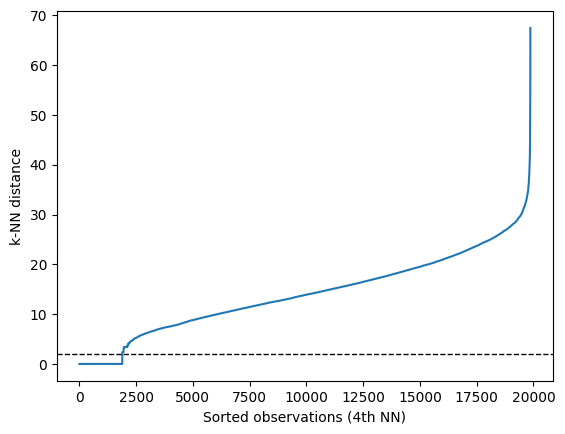

In [51]:
k_dist = sort_neigh_dist[:, 4 ]
plt.plot(k_dist)
plt.axhline(y=2, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [58]:
# experimental
min_pts = 2*(df_cnt.shape[1])

In [59]:

# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
neigbours = NearestNeighbors(n_neighbors=min_pts-1).fit(df_cnt)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = neigbours.kneighbors(df_cnt)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)
sort_neigh_dist

array([[ 0.        ,  0.        ,  0.        , ...,  2.        ,
         2.        ,  2.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.        ,
         2.        ,  2.        ],
       [ 0.        ,  0.        ,  0.        , ...,  2.        ,
         2.        ,  2.        ],
       ...,
       [ 0.        ,  8.30662386,  9.05538514, ..., 11.66190379,
        11.66190379, 11.66190379],
       [ 0.        ,  9.11043358,  9.2736185 , ..., 13.19090596,
        13.19090596, 13.19090596],
       [ 0.        ,  9.89949494, 10.04987562, ..., 13.19090596,
        13.19090596, 13.19090596]])

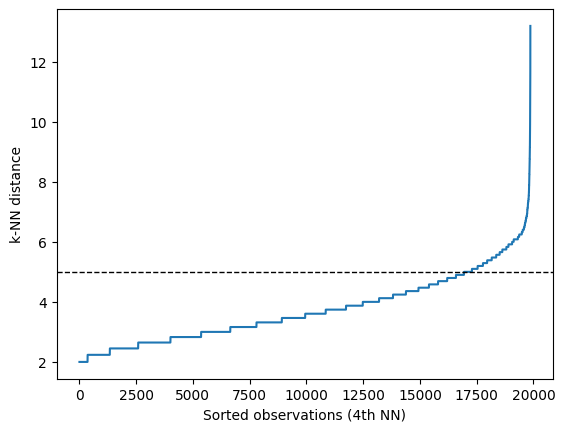

In [64]:
k_dist = sort_neigh_dist[:,min_pts-2]
plt.plot(k_dist)
plt.axhline(y=5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


In [65]:
print(f"num features is: {df_cnt.shape[1]}")

num features is: 1964


In [66]:
# from plot
eps = 5

print(f"min_pts parameter is: {min_pts}, epsilon parameter is: {eps}")

min_pts parameter is: 3928, epsilon parameter is: 5


### apply dbscan

In [ ]:
result = ds.dbscan(db_values = df_cnt, eps= eps, min_points= min_pts)

In [ ]:
df = pd.DataFrame(result) 
df